In [308]:
import pyspark as ps
from pyspark.sql.functions import *
import numpy as np
import matplotlib.pyplot as plt

spark = (ps.sql.SparkSession.builder 
        .master("local[4]") 
        .appName("rec case study") 
        .getOrCreate()
        )

sc = spark.sparkContext

In [17]:

links = spark.read.csv('data/ml-latest-small/links.csv', header=True)
movies = spark.read.csv('data/ml-latest-small/movies.csv', header=True)
ratings = spark.read.csv('data/ml-latest-small/ratings.csv', header=True)
tags = spark.read.csv('data/ml-latest-small/tags.csv', header=True)

In [61]:
links.show(5)
print(links.count())

+-------+-------+------+
|movieId| imdbId|tmdbId|
+-------+-------+------+
|      1|0114709|   862|
|      2|0113497|  8844|
|      3|0113228| 15602|
|      4|0114885| 31357|
|      5|0113041| 11862|
+-------+-------+------+
only showing top 5 rows

9742


In [62]:
movies.show(5)
print(movies.count())

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
+-------+--------------------+--------------------+
only showing top 5 rows

9742


In [63]:
ratings.show(5)
print(ratings.count())

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|     1|      1|   4.0|964982703|
|     1|      3|   4.0|964981247|
|     1|      6|   4.0|964982224|
|     1|     47|   5.0|964983815|
|     1|     50|   5.0|964982931|
+------+-------+------+---------+
only showing top 5 rows

100836


In [105]:
tags.show(40)
print(tags.count())

+------+-------+------------------+----------+
|userId|movieId|               tag| timestamp|
+------+-------+------------------+----------+
|     2|  60756|             funny|1445714994|
|     2|  60756|   Highly quotable|1445714996|
|     2|  60756|      will ferrell|1445714992|
|     2|  89774|      Boxing story|1445715207|
|     2|  89774|               MMA|1445715200|
|     2|  89774|         Tom Hardy|1445715205|
|     2| 106782|             drugs|1445715054|
|     2| 106782| Leonardo DiCaprio|1445715051|
|     2| 106782|   Martin Scorsese|1445715056|
|     7|  48516|      way too long|1169687325|
|    18|    431|         Al Pacino|1462138765|
|    18|    431|          gangster|1462138749|
|    18|    431|             mafia|1462138755|
|    18|   1221|         Al Pacino|1461699306|
|    18|   1221|             Mafia|1461699303|
|    18|   5995|         holocaust|1455735472|
|    18|   5995|        true story|1455735479|
|    18|  44665|      twist ending|1456948283|
|    18|  526

In [25]:
total= movies.join(tags,movies("movieId") ==  tags("movieId"),"inner")
total.show(5)

TypeError: 'DataFrame' object is not callable

In [65]:
inner_join = movies.join(tags, movies.movieId == tags.movieId, "outer")
inner_join.show(15)

+-------+--------------------+--------------------+------+-------+-------+----------+
|movieId|               title|              genres|userId|movieId|    tag| timestamp|
+-------+--------------------+--------------------+------+-------+-------+----------+
| 100553|Frozen Planet (2011)|         Documentary|  null|   null|   null|      null|
| 102684|Only God Forgives...|      Drama|Thriller|  null|   null|   null|      null|
|   1090|      Platoon (1986)|           Drama|War|   474|   1090|Vietnam|1138137990|
| 112911|     Hercules (2014)|    Action|Adventure|  null|   null|   null|      null|
| 115713|   Ex Machina (2015)|Drama|Sci-Fi|Thri...|  null|   null|   null|      null|
| 117630|Double Trouble (1...|Action|Comedy|Cri...|  null|   null|   null|      null|
| 119655|  Seventh Son (2014)|Adventure|Childre...|  null|   null|   null|      null|
| 120478|The Salt of the E...|         Documentary|  null|   null|   null|      null|
| 121007|Space Buddies (2009)|Adventure|Childre...|  n

In [66]:
mov_tag_join = movies.join(tags, ["movieId"], "outer")

mov_tag_join.show(15)


+-------+--------------------+--------------------+------+-------+----------+
|movieId|               title|              genres|userId|    tag| timestamp|
+-------+--------------------+--------------------+------+-------+----------+
| 100553|Frozen Planet (2011)|         Documentary|  null|   null|      null|
| 102684|Only God Forgives...|      Drama|Thriller|  null|   null|      null|
|   1090|      Platoon (1986)|           Drama|War|   474|Vietnam|1138137990|
| 112911|     Hercules (2014)|    Action|Adventure|  null|   null|      null|
| 115713|   Ex Machina (2015)|Drama|Sci-Fi|Thri...|  null|   null|      null|
| 117630|Double Trouble (1...|Action|Comedy|Cri...|  null|   null|      null|
| 119655|  Seventh Son (2014)|Adventure|Childre...|  null|   null|      null|
| 120478|The Salt of the E...|         Documentary|  null|   null|      null|
| 121007|Space Buddies (2009)|Adventure|Childre...|  null|   null|      null|
|   1572|Contempt (Mépris,...|               Drama|  null|   nul

In [67]:
mov_tag_join.createOrReplaceTempView("first_df")
result = spark.sql('''
    SELECT movieId, userId, title, genres, tag
    FROM first_df
    ''')

result.show()

# df_f = result.toPandas()
# df_f

+-------+------+--------------------+--------------------+-------------+
|movieId|userId|               title|              genres|          tag|
+-------+------+--------------------+--------------------+-------------+
| 100553|  null|Frozen Planet (2011)|         Documentary|         null|
| 102684|  null|Only God Forgives...|      Drama|Thriller|         null|
|   1090|   474|      Platoon (1986)|           Drama|War|      Vietnam|
| 112911|  null|     Hercules (2014)|    Action|Adventure|         null|
| 115713|  null|   Ex Machina (2015)|Drama|Sci-Fi|Thri...|         null|
| 117630|  null|Double Trouble (1...|Action|Comedy|Cri...|         null|
| 119655|  null|  Seventh Son (2014)|Adventure|Childre...|         null|
| 120478|  null|The Salt of the E...|         Documentary|         null|
| 121007|  null|Space Buddies (2009)|Adventure|Childre...|         null|
|   1572|  null|Contempt (Mépris,...|               Drama|         null|
| 158813|  null|Alice Through the...|Adventure|Chil

In [70]:
# mov_tag_rating_join = mov_tag_join.join(ratings, ["movieId"])

mov_tag_rating_join = mov_tag_join.join(ratings, ["movieId", 'userId'], 'outer')

mov_tag_rating_join.show()
print(mov_tag_rating_join.count())

+-------+------+--------------------+--------------------+--------------------+----------+------+----------+
|movieId|userId|               title|              genres|                 tag| timestamp|rating| timestamp|
+-------+------+--------------------+--------------------+--------------------+----------+------+----------+
| 100553|  null|Frozen Planet (2011)|         Documentary|                null|      null|  null|      null|
| 102684|  null|Only God Forgives...|      Drama|Thriller|                null|      null|  null|      null|
|      1|   330|                null|                null|                null|      null|   4.0|1285904910|
|    100|   207|                null|                null|                null|      null|   3.0|1258548270|
| 101072|    50|                null|                null|                null|      null|   2.5|1514240485|
| 101577|   448|                null|                null|                null|      null|   1.0|1399147624|
| 102125|   210|   

In [71]:
mov_tag_rating_join.createOrReplaceTempView("second_df")
new_result = spark.sql('''
    SELECT userId, movieId, rating, title, genres, tag
    FROM second_df
    ''')

new_result.show()

+------+-------+------+--------------------+--------------------+--------------------+
|userId|movieId|rating|               title|              genres|                 tag|
+------+-------+------+--------------------+--------------------+--------------------+
|  null| 100553|  null|Frozen Planet (2011)|         Documentary|                null|
|  null| 102684|  null|Only God Forgives...|      Drama|Thriller|                null|
|   330|      1|   4.0|                null|                null|                null|
|   207|    100|   3.0|                null|                null|                null|
|    50| 101072|   2.5|                null|                null|                null|
|   448| 101577|   1.0|                null|                null|                null|
|   210| 102125|   4.5|                null|                null|                null|
|   105| 102602|   4.0|                null|                null|                null|
|   469|   1028|   4.0|                null

In [72]:
full_join = mov_tag_rating_join.join(links, ["movieId"], 'outer')

full_join.show()
print(full_join.count())

+-------+------+--------------------+--------------+-------+----------+------+----------+-------+------+
|movieId|userId|               title|        genres|    tag| timestamp|rating| timestamp| imdbId|tmdbId|
+-------+------+--------------------+--------------+-------+----------+------+----------+-------+------+
| 100553|  null|Frozen Planet (2011)|   Documentary|   null|      null|  null|      null|2092588|134481|
| 100553|   105|                null|          null|   null|      null|   4.5|1446572398|2092588|134481|
| 100553|   318|                null|          null|   null|      null|   4.5|1426353247|2092588|134481|
| 102684|  null|Only God Forgives...|Drama|Thriller|   null|      null|  null|      null|1602613| 77987|
| 102684|   380|                null|          null|   null|      null|   4.0|1494709199|1602613| 77987|
| 102684|   249|                null|          null|   null|      null|   3.5|1376654552|1602613| 77987|
|   1090|   372|                null|          null|   

In [73]:
full_join.createOrReplaceTempView("third_df")
final_result = spark.sql('''
    SELECT userId, movieId, rating, title, genres, tag, imdbId, tmdbId
    FROM third_df
    ''')

final_result.show()

+------+-------+------+--------------------+--------------+-------+-------+------+
|userId|movieId|rating|               title|        genres|    tag| imdbId|tmdbId|
+------+-------+------+--------------------+--------------+-------+-------+------+
|  null| 100553|  null|Frozen Planet (2011)|   Documentary|   null|2092588|134481|
|   105| 100553|   4.5|                null|          null|   null|2092588|134481|
|   318| 100553|   4.5|                null|          null|   null|2092588|134481|
|  null| 102684|  null|Only God Forgives...|Drama|Thriller|   null|1602613| 77987|
|   380| 102684|   4.0|                null|          null|   null|1602613| 77987|
|   249| 102684|   3.5|                null|          null|   null|1602613| 77987|
|   372|   1090|   4.0|                null|          null|   null|0091763|   792|
|   384|   1090|   4.0|                null|          null|   null|0091763|   792|
|   474|   1090|   3.5|      Platoon (1986)|     Drama|War|Vietnam|0091763|   792|
|   

In [74]:
full_df = final_result.toPandas()

full_df

,userId,movieId,rating,title,genres,tag,imdbId,tmdbId
0,None,100553,None,Frozen Planet (2011),Documentary,None,2092588,134481
1,105,100553,4.5,None,None,None,2092588,134481
2,318,100553,4.5,None,None,None,2092588,134481
3,None,102684,None,Only God Forgives (2013),Drama|Thriller,None,1602613,77987
4,380,102684,4.0,None,None,None,1602613,77987
...,...,...,...,...,...,...,...,...
111049,414,96610,4.5,None,None,None,1276104,59967
111050,331,96610,3.5,None,None,None,1276104,59967
111051,582,96610,2.5,None,None,None,1276104,59967
111052,256,96610,4.0,None,None,None,1276104,59967


In [75]:
# full_df['genres'] = full_df['genres'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))

full_df['genres'] = full_df['genres'].str.replace('|', ' ')

full_df.head()

,userId,movieId,rating,title,genres,tag,imdbId,tmdbId
0,None,100553,None,Frozen Planet (2011),Documentary,None,2092588,134481
1,105,100553,4.5,None,None,None,2092588,134481
2,318,100553,4.5,None,None,None,2092588,134481
3,None,102684,None,Only God Forgives (2013),Drama Thriller,None,1602613,77987
4,380,102684,4.0,None,None,None,1602613,77987


## Trying Again

In [89]:
rating_tag_join = ratings.join(tags, ["movieId", 'userId'], "left")

rating_tag_join.show()
print(rating_tag_join.count())

+-------+------+------+---------+----+---------+
|movieId|userId|rating|timestamp| tag|timestamp|
+-------+------+------+---------+----+---------+
|      1|     1|   4.0|964982703|null|     null|
|      3|     1|   4.0|964981247|null|     null|
|      6|     1|   4.0|964982224|null|     null|
|     47|     1|   5.0|964983815|null|     null|
|     50|     1|   5.0|964982931|null|     null|
|     70|     1|   3.0|964982400|null|     null|
|    101|     1|   5.0|964980868|null|     null|
|    110|     1|   4.0|964982176|null|     null|
|    151|     1|   5.0|964984041|null|     null|
|    157|     1|   5.0|964984100|null|     null|
|    163|     1|   5.0|964983650|null|     null|
|    216|     1|   5.0|964981208|null|     null|
|    223|     1|   3.0|964980985|null|     null|
|    231|     1|   5.0|964981179|null|     null|
|    235|     1|   4.0|964980908|null|     null|
|    260|     1|   5.0|964981680|null|     null|
|    296|     1|   3.0|964982967|null|     null|
|    316|     1|   3

In [94]:
rating_tag_join.createOrReplaceTempView("dfone")
first = spark.sql('''
    SELECT userId, movieId, rating, tag
    FROM dfone
    ''')

first.show(50)

+------+-------+------+----+
|userId|movieId|rating| tag|
+------+-------+------+----+
|     1|      1|   4.0|null|
|     1|      3|   4.0|null|
|     1|      6|   4.0|null|
|     1|     47|   5.0|null|
|     1|     50|   5.0|null|
|     1|     70|   3.0|null|
|     1|    101|   5.0|null|
|     1|    110|   4.0|null|
|     1|    151|   5.0|null|
|     1|    157|   5.0|null|
|     1|    163|   5.0|null|
|     1|    216|   5.0|null|
|     1|    223|   3.0|null|
|     1|    231|   5.0|null|
|     1|    235|   4.0|null|
|     1|    260|   5.0|null|
|     1|    296|   3.0|null|
|     1|    316|   3.0|null|
|     1|    333|   5.0|null|
|     1|    349|   4.0|null|
|     1|    356|   4.0|null|
|     1|    362|   5.0|null|
|     1|    367|   4.0|null|
|     1|    423|   3.0|null|
|     1|    441|   4.0|null|
|     1|    457|   5.0|null|
|     1|    480|   4.0|null|
|     1|    500|   3.0|null|
|     1|    527|   5.0|null|
|     1|    543|   4.0|null|
|     1|    552|   4.0|null|
|     1|    55

In [95]:
rating_tag_movies_join = first.join(movies, ["movieId"], "left")

rating_tag_movies_join.show()
print(rating_tag_movies_join.count())

+-------+------+------+----+--------------------+--------------------+
|movieId|userId|rating| tag|               title|              genres|
+-------+------+------+----+--------------------+--------------------+
|      1|     1|   4.0|null|    Toy Story (1995)|Adventure|Animati...|
|      3|     1|   4.0|null|Grumpier Old Men ...|      Comedy|Romance|
|      6|     1|   4.0|null|         Heat (1995)|Action|Crime|Thri...|
|     47|     1|   5.0|null|Seven (a.k.a. Se7...|    Mystery|Thriller|
|     50|     1|   5.0|null|Usual Suspects, T...|Crime|Mystery|Thr...|
|     70|     1|   3.0|null|From Dusk Till Da...|Action|Comedy|Hor...|
|    101|     1|   5.0|null|Bottle Rocket (1996)|Adventure|Comedy|...|
|    110|     1|   4.0|null|   Braveheart (1995)|    Action|Drama|War|
|    151|     1|   5.0|null|      Rob Roy (1995)|Action|Drama|Roma...|
|    157|     1|   5.0|null|Canadian Bacon (1...|          Comedy|War|
|    163|     1|   5.0|null|    Desperado (1995)|Action|Romance|We...|
|    2

In [100]:
rating_tag_movies_links_join = rating_tag_movies_join.join(links, ["movieId"], "left")

rating_tag_movies_links_join.show(5)
print(rating_tag_movies_links_join.count())

+-------+------+------+----+--------------------+--------------------+-------+------+
|movieId|userId|rating| tag|               title|              genres| imdbId|tmdbId|
+-------+------+------+----+--------------------+--------------------+-------+------+
|      1|     1|   4.0|null|    Toy Story (1995)|Adventure|Animati...|0114709|   862|
|      3|     1|   4.0|null|Grumpier Old Men ...|      Comedy|Romance|0113228| 15602|
|      6|     1|   4.0|null|         Heat (1995)|Action|Crime|Thri...|0113277|   949|
|     47|     1|   5.0|null|Seven (a.k.a. Se7...|    Mystery|Thriller|0114369|   807|
|     50|     1|   5.0|null|Usual Suspects, T...|Crime|Mystery|Thr...|0114814|   629|
+-------+------+------+----+--------------------+--------------------+-------+------+
only showing top 5 rows

102677


In [101]:
final_df = rating_tag_movies_links_join.toPandas()

final_df

,movieId,userId,rating,tag,title,genres,imdbId,tmdbId
0,1,1,4.0,None,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0114709,862
1,3,1,4.0,None,Grumpier Old Men (1995),Comedy|Romance,0113228,15602
2,6,1,4.0,None,Heat (1995),Action|Crime|Thriller,0113277,949
3,47,1,5.0,None,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,0114369,807
4,50,1,5.0,None,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,0114814,629
...,...,...,...,...,...,...,...,...
102672,166534,610,4.0,None,Split (2017),Drama|Horror|Thriller,4972582,381288
102673,168248,610,5.0,Heroic Bloodshed,John Wick: Chapter Two (2017),Action|Crime|Thriller,4425200,324552
102674,168250,610,5.0,None,Get Out (2017),Horror,5052448,419430
102675,168252,610,5.0,None,Logan (2017),Action|Sci-Fi,3315342,263115


In [102]:
final_df['genres'] = final_df['genres'].str.replace('|', ' ')

final_df.head()

,movieId,userId,rating,tag,title,genres,imdbId,tmdbId
0,1,1,4.0,None,Toy Story (1995),Adventure Animation Children Comedy Fantasy,0114709,862
1,3,1,4.0,None,Grumpier Old Men (1995),Comedy Romance,0113228,15602
2,6,1,4.0,None,Heat (1995),Action Crime Thriller,0113277,949
3,47,1,5.0,None,Seven (a.k.a. Se7en) (1995),Mystery Thriller,0114369,807
4,50,1,5.0,None,"Usual Suspects, The (1995)",Crime Mystery Thriller,0114814,629


In [103]:
# final_df.to_csv('data/cleaned_data.csv')

In [104]:
n = final_df.nunique(axis=0)

print(n)

movieId    9724
userId      610
rating       10
tag        1543
title      9719
genres      951
imdbId     9724
tmdbId     9715
dtype: int64


In [138]:
#  Create Tag DF 

tag_df = tags.toPandas()
tag_df.reset_index(drop= True, inplace=True)

tag_df

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [176]:
# print(tag_df['movieId']
      
dups_movie = tag_df.pivot_table(index=['movieId'], aggfunc='size').sort_values(ascending=False)
dups_movie

movieId
296     181
2959     54
924      41
293      35
7361     34
       ... 
4263      1
4262      1
4259      1
4246      1
4138      1
Length: 1572, dtype: int64

In [143]:
n = tag_df.nunique(axis=0)
print(n)

userId         58
movieId      1572
tag          1589
timestamp    3411
dtype: int64


In [169]:
tag_df['userId'] = tag_df['userId'].astype(int)

tag_df['movieId'] = tag_df['movieId'].astype(int)

In [170]:
foo = lambda a: " / ".join(a) 


tag__df = tag_df.groupby(['userId', 'movieId']).agg({'tag': foo}).reset_index()
# tag__df = tag_df.groupby(['userId', 'movieId']).agg({'tag': foo}).reset_index()
# tag__df = tag_df.groupby(['movieId']).agg({'tag': foo}).reset_index()


tag__df


,userId,movieId,tag
0,2,60756,funny / Highly quotable / will ferrell
1,2,89774,Boxing story / MMA / Tom Hardy
2,2,106782,drugs / Leonardo DiCaprio / Martin Scorsese
3,7,48516,way too long
4,18,431,Al Pacino / gangster / mafia
...,...,...,...
1770,606,6107,World War II
1771,606,7382,for katie
1772,606,7936,austere
1773,610,3265,gun fu / heroic bloodshed


In [171]:
new = tag__df.loc[tag__df['userId'] == 2]

new

,userId,movieId,tag
0,2,60756,funny / Highly quotable / will ferrell
1,2,89774,Boxing story / MMA / Tom Hardy
2,2,106782,drugs / Leonardo DiCaprio / Martin Scorsese


In [177]:
# Combine Tag with Rating and Name

tag_rating_join = tags.join(ratings, ["movieId", 'userId'], "left")

tag_rating_join.show()
print(tag_rating_join.count())

+-------+------+-----------------+----------+------+----------+
|movieId|userId|              tag| timestamp|rating| timestamp|
+-------+------+-----------------+----------+------+----------+
|  60756|     2|            funny|1445714994|   5.0|1445714980|
|  60756|     2|  Highly quotable|1445714996|   5.0|1445714980|
|  60756|     2|     will ferrell|1445714992|   5.0|1445714980|
|  89774|     2|     Boxing story|1445715207|   5.0|1445715189|
|  89774|     2|              MMA|1445715200|   5.0|1445715189|
|  89774|     2|        Tom Hardy|1445715205|   5.0|1445715189|
| 106782|     2|            drugs|1445715054|   5.0|1445714966|
| 106782|     2|Leonardo DiCaprio|1445715051|   5.0|1445714966|
| 106782|     2|  Martin Scorsese|1445715056|   5.0|1445714966|
|  48516|     7|     way too long|1169687325|   1.0|1169687318|
|    431|    18|        Al Pacino|1462138765|   4.0|1462138790|
|    431|    18|         gangster|1462138749|   4.0|1462138790|
|    431|    18|            mafia|146213

In [180]:
tag_rating_join.createOrReplaceTempView("dfon")
tg = spark.sql('''
    SELECT movieId, userId, tag, rating
    FROM dfon
    ''')

tg.show()
print(tg.count())

+-------+------+-----------------+------+
|movieId|userId|              tag|rating|
+-------+------+-----------------+------+
|  60756|     2|            funny|   5.0|
|  60756|     2|  Highly quotable|   5.0|
|  60756|     2|     will ferrell|   5.0|
|  89774|     2|     Boxing story|   5.0|
|  89774|     2|              MMA|   5.0|
|  89774|     2|        Tom Hardy|   5.0|
| 106782|     2|            drugs|   5.0|
| 106782|     2|Leonardo DiCaprio|   5.0|
| 106782|     2|  Martin Scorsese|   5.0|
|  48516|     7|     way too long|   1.0|
|    431|    18|        Al Pacino|   4.0|
|    431|    18|         gangster|   4.0|
|    431|    18|            mafia|   4.0|
|   1221|    18|        Al Pacino|   5.0|
|   1221|    18|            Mafia|   5.0|
|   5995|    18|        holocaust|   4.5|
|   5995|    18|       true story|   4.5|
|  44665|    18|     twist ending|   4.5|
|  52604|    18|  Anthony Hopkins|   4.5|
|  52604|    18|  courtroom drama|   4.5|
+-------+------+-----------------+

In [182]:
tag_rating_mov_join = tag_rating_join.join(movies, ["movieId"], "left")

tag_rating_mov_join.show()
print(tag_rating_mov_join.count())

+-------+------+-----------------+----------+------+----------+--------------------+--------------------+
|movieId|userId|              tag| timestamp|rating| timestamp|               title|              genres|
+-------+------+-----------------+----------+------+----------+--------------------+--------------------+
|  60756|     2|            funny|1445714994|   5.0|1445714980|Step Brothers (2008)|              Comedy|
|  60756|     2|  Highly quotable|1445714996|   5.0|1445714980|Step Brothers (2008)|              Comedy|
|  60756|     2|     will ferrell|1445714992|   5.0|1445714980|Step Brothers (2008)|              Comedy|
|  89774|     2|     Boxing story|1445715207|   5.0|1445715189|      Warrior (2011)|               Drama|
|  89774|     2|              MMA|1445715200|   5.0|1445715189|      Warrior (2011)|               Drama|
|  89774|     2|        Tom Hardy|1445715205|   5.0|1445715189|      Warrior (2011)|               Drama|
| 106782|     2|            drugs|1445715054| 

In [183]:
tag_rating_mov_join.createOrReplaceTempView("dfo")
tgr = spark.sql('''
    SELECT movieId, userId, tag, rating, title
    FROM dfo
    ''')

tgr.show()
print(tgr.count())

+-------+------+-----------------+------+--------------------+
|movieId|userId|              tag|rating|               title|
+-------+------+-----------------+------+--------------------+
|  60756|     2|            funny|   5.0|Step Brothers (2008)|
|  60756|     2|  Highly quotable|   5.0|Step Brothers (2008)|
|  60756|     2|     will ferrell|   5.0|Step Brothers (2008)|
|  89774|     2|     Boxing story|   5.0|      Warrior (2011)|
|  89774|     2|              MMA|   5.0|      Warrior (2011)|
|  89774|     2|        Tom Hardy|   5.0|      Warrior (2011)|
| 106782|     2|            drugs|   5.0|Wolf of Wall Stre...|
| 106782|     2|Leonardo DiCaprio|   5.0|Wolf of Wall Stre...|
| 106782|     2|  Martin Scorsese|   5.0|Wolf of Wall Stre...|
|  48516|     7|     way too long|   1.0|Departed, The (2006)|
|    431|    18|        Al Pacino|   4.0|Carlito's Way (1993)|
|    431|    18|         gangster|   4.0|Carlito's Way (1993)|
|    431|    18|            mafia|   4.0|Carlito's Way 

In [189]:
tags_mov_df = tgr.toPandas()
tags_mov_df.reset_index(drop= True, inplace=True)

tags_mov_df['userId'] = tags_mov_df['userId'].astype(int)

tags_mov_df['movieId'] = tags_mov_df['movieId'].astype(int)

tags_mov_df['rating'] = tags_mov_df['rating'].astype(float)

tags_mov_df

,movieId,userId,tag,rating,title
0,60756,2,funny,5.0,Step Brothers (2008)
1,60756,2,Highly quotable,5.0,Step Brothers (2008)
2,60756,2,will ferrell,5.0,Step Brothers (2008)
3,89774,2,Boxing story,5.0,Warrior (2011)
4,89774,2,MMA,5.0,Warrior (2011)
...,...,...,...,...,...
3678,7382,606,for katie,4.5,I'm Not Scared (Io non ho paura) (2003)
3679,7936,606,austere,NaN,Shame (Skammen) (1968)
3680,3265,610,gun fu,5.0,Hard-Boiled (Lat sau san taam) (1992)
3681,3265,610,heroic bloodshed,5.0,Hard-Boiled (Lat sau san taam) (1992)


In [200]:
tags_mov_df['tag_amount'] = 1

tags_mov_df

,movieId,userId,tag,rating,title,tag_amount
0,60756,2,funny,5.0,Step Brothers (2008),1
1,60756,2,Highly quotable,5.0,Step Brothers (2008),1
2,60756,2,will ferrell,5.0,Step Brothers (2008),1
3,89774,2,Boxing story,5.0,Warrior (2011),1
4,89774,2,MMA,5.0,Warrior (2011),1
...,...,...,...,...,...,...
3678,7382,606,for katie,4.5,I'm Not Scared (Io non ho paura) (2003),1
3679,7936,606,austere,NaN,Shame (Skammen) (1968),1
3680,3265,610,gun fu,5.0,Hard-Boiled (Lat sau san taam) (1992),1
3681,3265,610,heroic bloodshed,5.0,Hard-Boiled (Lat sau san taam) (1992),1


In [192]:
datatypes = tags_mov_df.dtypes 
datatypes

movieId      int64
userId       int64
tag         object
rating     float64
title       object
dtype: object

In [228]:
foo = lambda a: " / ".join(a) 


tgmvie_df = tags_mov_df.groupby(['userId', 'movieId', 'title']).agg({'tag': foo, 'rating': 'mean', 'tag_amount': 'sum'}).reset_index()

tgmvie_df.sort_values(by='tag_amount', ascending=False).head()



,userId,movieId,title,tag,rating,tag_amount
1761,599,296,Pulp Fiction (1994),1990s / achronological / action / action packe...,5.0,173
1764,599,2959,Fight Club (1999),action / atmospheric / based on a book / Brad ...,5.0,48
1762,599,924,2001: A Space Odyssey (1968),aliens / apes / Arthur C. Clarke / artificial ...,5.0,39
1760,599,293,Léon: The Professional (a.k.a. The Professiona...,Action / assassin / assassination / assassins ...,5.0,32
1763,599,1732,"Big Lebowski, The (1998)",black comedy / bowling / classic / coen brothe...,5.0,31
1662,567,7361,Eternal Sunshine of the Spotless Mind (2004),arthouse / artistic / atmospheric / beautiful ...,5.0,24
73,62,135536,Suicide Squad (2016),Bad story / Bad writing / Batman / Ben Affleck...,4.0,19
1650,567,4144,In the Mood For Love (Fa yeung nin wa) (2000),atmospheric / Beautiful / bittersweet / dreamy...,4.5,18
1648,567,3676,Eraserhead (1977),art house / Atmospheric / creepy / cryptic / d...,5.0,16
1653,567,4878,Donnie Darko (2001),atmospheric / cerebral / dreamlike / enigmatic...,3.5,13


In [245]:
# Super User Tags

user_tags = tgmvie_df.groupby('userId') \
       .agg(Tag_Count=('tag_amount', 'sum'), movie_amount=('movieId', 'count'), Avg_rating=('rating', 'mean')) \
       .reset_index()

user_tags.sort_values('Tag_Count', ascending=False).head()


,userId,Tag_Count,movie_amount,Avg_rating
42,474,1507,1235,3.668842
52,567,432,109,3.628440
5,62,370,69,3.869565
54,599,323,5,5.000000
43,477,280,68,4.257576


In [ ]:
#  Group By Super Users: amount of reviews left and amount of tags

In [204]:
# tgmvie_df.to_csv('data/tags&ratings.csv')

,userId,movieId,tag
87,103,296,good dialogue / great soundtrack / non-linear
217,424,296,cult film / drugs / Quentin Tarantino / Tarantino
360,474,296,hit men
1761,599,296,1990s / achronological / action / action packe...


In [211]:
foo = lambda a: " / ".join(a) 


movie_no_user_df = tags_mov_df.groupby(['movieId', 'title']).agg({'tag': foo, 'rating': 'mean', 'tag_amount': 'sum'}).reset_index()

movie_no_user_df.sort_values(by='tag_amount', ascending=False)



,movieId,title,tag,rating,tag_amount
77,296,Pulp Fiction (1994),good dialogue / great soundtrack / non-linear ...,4.983425,181
639,2959,Fight Club (1999),dark comedy / psychology / thought-provoking /...,4.944444,54
206,924,2001: A Space Odyssey (1968),Hal / space / aliens / apes / Arthur C. Clarke...,4.951220,41
76,293,Léon: The Professional (a.k.a. The Professiona...,assassin / Jean Reno / hit men / Action / assa...,4.928571,35
1149,7361,Eternal Sunshine of the Spotless Mind (2004),alternate reality / memory / thought-provoking...,4.816667,34
...,...,...,...,...,...
778,4029,State and Main (2000),movies,4.500000,1
780,4046,Friendly Persuasion (1956),Quakers,4.000000,1
781,4077,"With a Friend Like Harry... (Harry, un ami qui...",psychopaths,4.000000,1
782,4105,"Evil Dead, The (1981)",zombies,2.000000,1


### Another One with Ratings with most Reviews

In [212]:
# Combine Ratings with Name

rating_name_join = ratings.join(movies, ["movieId"], "left")

rating_name_join.show()
print(rating_name_join.count())

+-------+------+------+---------+--------------------+--------------------+
|movieId|userId|rating|timestamp|               title|              genres|
+-------+------+------+---------+--------------------+--------------------+
|      1|     1|   4.0|964982703|    Toy Story (1995)|Adventure|Animati...|
|      3|     1|   4.0|964981247|Grumpier Old Men ...|      Comedy|Romance|
|      6|     1|   4.0|964982224|         Heat (1995)|Action|Crime|Thri...|
|     47|     1|   5.0|964983815|Seven (a.k.a. Se7...|    Mystery|Thriller|
|     50|     1|   5.0|964982931|Usual Suspects, T...|Crime|Mystery|Thr...|
|     70|     1|   3.0|964982400|From Dusk Till Da...|Action|Comedy|Hor...|
|    101|     1|   5.0|964980868|Bottle Rocket (1996)|Adventure|Comedy|...|
|    110|     1|   4.0|964982176|   Braveheart (1995)|    Action|Drama|War|
|    151|     1|   5.0|964984041|      Rob Roy (1995)|Action|Drama|Roma...|
|    157|     1|   5.0|964984100|Canadian Bacon (1...|          Comedy|War|
|    163|   

In [358]:
rating_name_df = rating_name_join.toPandas()

rating_name_df['rating'] = rating_name_df['rating'].astype(float)

# title_group = rating_name_df.groupby('title')['rating'].count().to_frame().reset_index().sort_values('rating', ascending=False)[:15]
# title_group = rating_name_df.groupby('title').agg({'rating': 'count', 'rating': 'mean'}).reset_index()



title_group = rating_name_df.groupby('title') \
       .agg(Rating_Count=('rating', 'count'), Avg_rating=('rating', 'mean')) \
       .reset_index()

title_group_show = title_group.sort_values('Rating_Count', ascending=False)[:10]
title_group_show

,title,Rating_Count,Avg_rating
3158,Forrest Gump (1994),329,4.164134
7593,"Shawshank Redemption, The (1994)",317,4.429022
6865,Pulp Fiction (1994),307,4.197068
7680,"Silence of the Lambs, The (1991)",279,4.161290
5512,"Matrix, The (1999)",278,4.192446
8001,Star Wars: Episode IV - A New Hope (1977),251,4.231076
4662,Jurassic Park (1993),238,3.750000
1337,Braveheart (1995),237,4.031646
8363,Terminator 2: Judgment Day (1991),224,3.970982
7421,Schindler's List (1993),220,4.225000


In [365]:
# Highest Average Reviews

# title_rat_group = title_group.sort_values('Avg_rating', ascending=False)
title_rat_group = title_group[(title_group['Rating_Count'] >= 3)].sort_values('Avg_rating', ascending=False)
title_rat_group

,title,Rating_Count,Avg_rating
8917,"Trial, The (Procès, Le) (1962)",5,4.900000
9366,What We Do in the Shadows (2014),3,4.833333
752,Bad Boy Bubby (1993),3,4.833333
9557,Woman in the Dunes (Suna no onna) (1964),4,4.750000
8710,"Three Billboards Outside Ebbing, Missouri (2017)",8,4.750000
...,...,...,...
2183,Date Movie (2006),3,0.833333
3256,From Justin to Kelly (2003),3,0.833333
4473,It's Pat (1994),3,0.833333
6709,Police Academy: Mission to Moscow (1994),5,0.800000


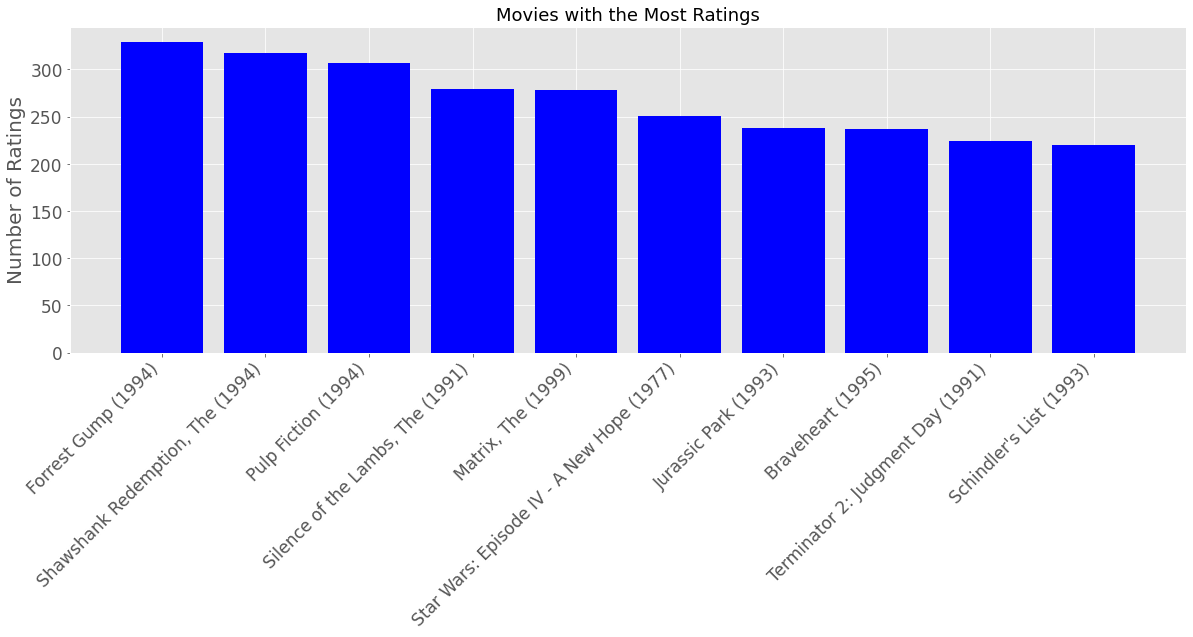

In [384]:
# Top Reviewed Films plot 
plt.style.use('ggplot')
fig, ax = plt.subplots(1, figsize=(20, 6))
x = title_group_show.iloc[:, 0]
y = title_group_show.iloc[:,1]
ax.bar(x, y, color='b')
# ax.set_xlabel("Movie", fontsize=17)
ax.set_ylabel("Number of Ratings", fontsize=20)
plt.yticks(fontsize=17)
plt.xticks(rotation=45, fontsize=17, horizontalalignment='right')
ax.set_title("Movies with the Most Ratings", fontsize=18);

In [376]:
user_group = rating_name_df.groupby('userId') \
       .agg(Rating_Count=('rating', 'count'), Avg_rating=('rating', 'mean'), Movies_Reviewed=('movieId', 'count')) \
       .reset_index()

user_group.sort_values('Rating_Count', ascending=False).tail(37)

,userId,Rating_Count,Avg_rating,Movies_Reviewed
21,118,22,3.818182,22
103,192,22,4.045455,22
480,531,22,3.772727,22
420,478,22,2.818182,22
438,494,22,4.227273,22
128,214,22,2.863636,22
371,433,22,3.772727,22
342,407,22,4.113636,22
453,507,21,3.380952,21
178,26,21,3.238095,21


In [239]:
n = user_group.nunique(axis=0)
n

userId             610
Rating_Count       261
Avg_rating         549
Movies_Reviewed    261
dtype: int64

Text(0.5, 1.0, 'Amount of Users by Rating')

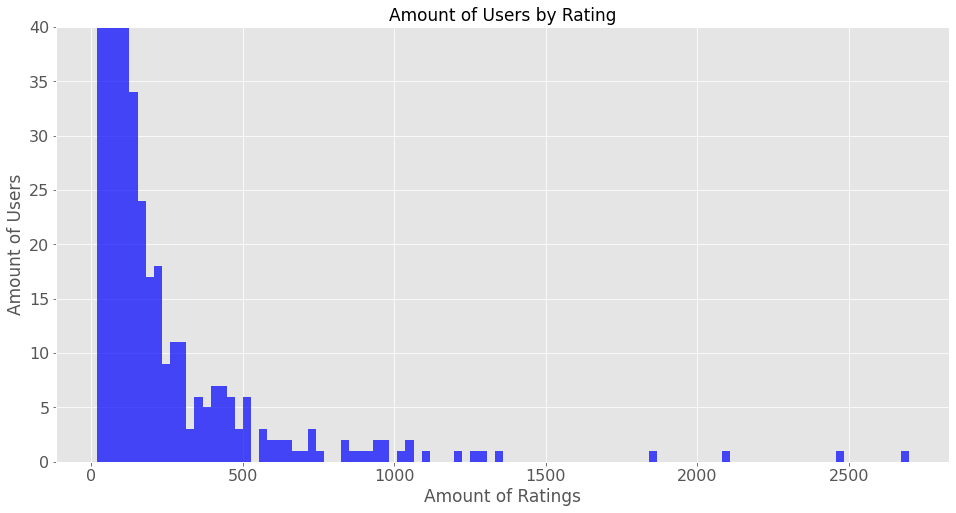

In [380]:
import matplotlib.pyplot as plt

plt.figure(figsize=[16,8])
plt.hist(user_group.Rating_Count, bins = 100, color='b',alpha=0.7 )
plt.xlabel('Amount of Ratings',fontsize=17)
plt.ylabel('Amount of Users',fontsize=17)
plt.ylim(0,40)
plt.xlim()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Amount of Users by Rating',fontsize=17)

In [374]:
small = user_group[(user_group['Rating_Count'] >= 15) & (user_group['Rating_Count'] <=60)].groupby('userId')['Rating_Count'].sum().to_frame().reset_index().sort_values('Rating_Count', ascending=False)

medium = user_group[(user_group['Rating_Count'] > 60) & (user_group['Rating_Count'] <=300)].groupby('userId')['Rating_Count'].sum().to_frame().reset_index().sort_values('Rating_Count', ascending=False)

large = user_group[(user_group['Rating_Count'] > 300) & (user_group['Rating_Count'] <=500)].groupby('userId')['Rating_Count'].sum().to_frame().reset_index().sort_values('Rating_Count', ascending=False)

exl = user_group[(user_group['Rating_Count'] > 500) & (user_group['Rating_Count'] <=1500)].groupby('userId')['Rating_Count'].sum().to_frame().reset_index().sort_values('Rating_Count', ascending=False)

super_ = user_group[(user_group['Rating_Count'] > 1500)].groupby('userId')['Rating_Count'].sum().to_frame().reset_index().sort_values('Rating_Count', ascending=False)

sm = small['Rating_Count'].count()
me = medium['Rating_Count'].count()
lr = large['Rating_Count'].count()
xl = exl['Rating_Count'].count()
su = super_['Rating_Count'].count()

ls = [sm, me, lr, xl,su]

for i in ls:
    print(i)
    


276
251
40
39
4


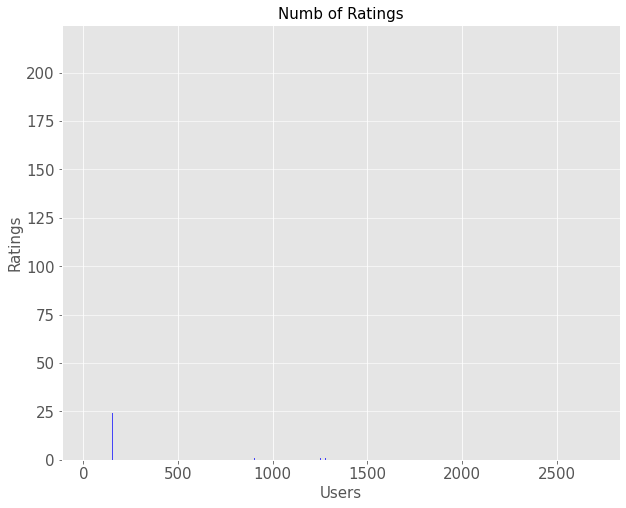

In [278]:
plt.figure(figsize=[10,8])

plt.hist(user_group.Rating_Count, bins = 100, width = 0.5, color='b',alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Users',fontsize=15)
plt.ylabel('Ratings',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Numb of Ratings',fontsize=15)
plt.show()